In [1]:
import pandas as pd
import numpy as np
stock = pd.read_csv('AAPL_stock_data.csv')

new_stock = stock

In [2]:
# Convert the 'Date' column to datetime format if it's not already
new_stock.Date = pd.to_datetime(new_stock.Date)

# Create a new column in the DataFrame to categorize the data into 'Before' and 'After'
new_stock['Time_Period'] = new_stock['Date'] < '2022-12-01'

# Replace the boolean values with 'Before' and 'After'
new_stock['Time_Period'] = new_stock['Time_Period'].replace({True: 'Before', False: 'After'})

new_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Period
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,Before
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,Before
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600,Before
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000,Before
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449326,86709100,Before


In [3]:
print(new_stock.columns)

before_data = new_stock[new_stock['Time_Period'] == 'Before']['Close']
after_data = new_stock[new_stock['Time_Period'] == 'After']['Close']

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Time_Period'],
      dtype='object')


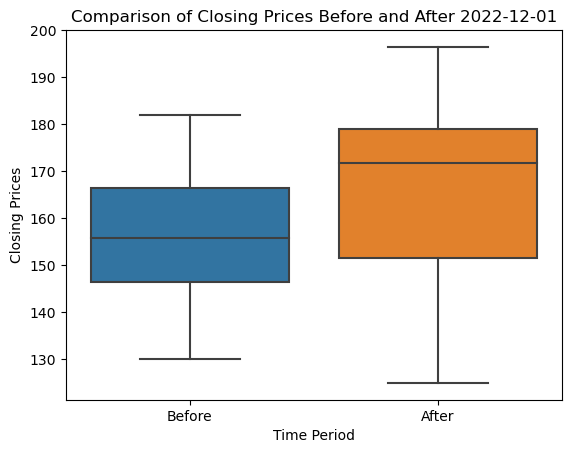

In [4]:
# TASK4-1 visualize the values of two groups:before 2022-12-01 and after 2022-12-01
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Time_Period', y='Close', data=new_stock)
plt.title('Comparison of Closing Prices Before and After 2022-12-01')
plt.xlabel('Time Period')
plt.ylabel('Closing Prices')
plt.show()

In [19]:
#TASK4-2 Create a faster equivalent of the randomisation test：
#hyposis:H0: the stock price before 2022-12-01 is not different from price afer 2022-12-01
import time

import numpy as np
import matplotlib.pyplot as plt

# Combine the two samples into one array
values_data = np.hstack((before_data, after_data))

start_time_test = time.time()
# Number of repetitions
n_repeat = 1000

# Create an array with each of 'Before' and 'After' labels repeated len(before) and len(after) times
groups_data = np.repeat(['Before', 'After'], [len(before_data), len(after_data)])

# Initialize an array to store test statistics
test_stats = np.empty(n_repeat)

# For reproducibility
np.random.seed(5763)

# Loop n_repeat times
for rep in range(n_repeat):
    # Shuffle the order of the group labels
    shuffled_groups = np.random.permutation(groups_data)

    # Compute and store the test statistic (mean difference between the two groups)
    mean_before = np.mean(values_data[shuffled_groups == 'Before'])
    mean_after = np.mean(values_data[shuffled_groups == 'After'])
    test_stats[rep] = mean_before - mean_after

# Calculate the observed statistic (mean difference between 'Before' and 'After')
observed_stat = before_data.mean() - after_data.mean()
print("Observed Statistic: ", observed_stat)

end_time_test = time.time()

#TASK4-3 p-value
# Add the observed statistic to the test_stats array
test_stats = np.hstack((test_stats, observed_stat))

# Calculate the p-value
p_value = np.sum(np.abs(test_stats) >= np.abs(observed_stat)) / len(test_stats)
print("P-Value: ", p_value)

Observed Statistic:  -9.870932318559056
P-Value:  0.000999000999000999


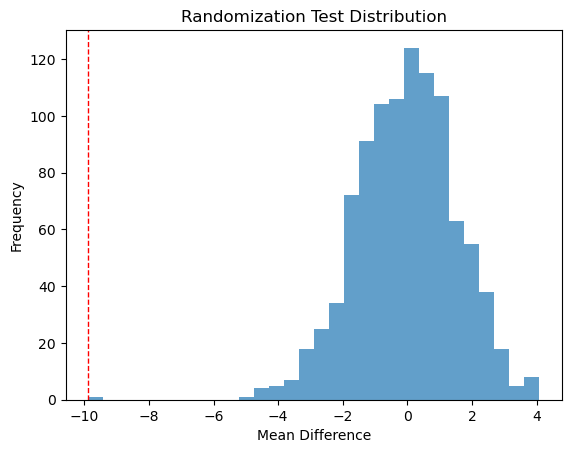

In [20]:
#TASK4-3 visualisation of observed test and sampling distribution.
import numpy as np
import matplotlib.pyplot as plt

plt.hist(test_stats, bins=30, alpha=0.7)
plt.axvline(observed_stat, color='r', linestyle='dashed', linewidth=1)
plt.title('Randomization Test Distribution')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()

#print(f"P-value (Permutation Test): {p_value_permutation}")
#we don't refuse H0, because p-value(0.506) is larger than 0.05;

In [ ]:
#TASK4-4 Compare code in the notes to your modified version to determine the speed-up
import time
start_time_ran = time.time()

# Initialisation
sample_before = np.random.choice(before_data, size=240, replace=True)
sample_after = np.random.choice(after_data, size=240, replace=True)

# no. of times we will shuffle the labels
n_repeat = 200 
# create a list with each of data set repeated 200 times
groups_data = np.repeat(["before_data", "after_data"],200)
# put samples into one list
values_data = np.hstack((sample_before, sample_after))
# create an empty array to store test statistic
test_stats = np.empty(n_repeat) 
# for reproducibility
np.random.seed(500) 

# Loop n_repeat times
for rep in range(n_repeat): 
    # Shuffle the order of the group labels
    shuffled_group = np.random.permutation(groups_data)

    # Find the indices corresponding to each group
    indices_before = np.where(shuffled_group == "before_data")[0]
    indices_after = np.where(shuffled_group == "after_data")[0]

    # Use the indices to extract the corresponding values from values_data
    values_before = values_data[indices_before]
    values_after = values_data[indices_after]
    
    test_stats[rep] = np.mean(values_after) - np.mean(values_before)
    
observed_stat = sample_after.mean() - sample_before.mean()
print("observed_statistic: ", observed_stat)

end_time_ran = time.time()

In [ ]:
#TASK4-4 Compare code in the notes to your modified version to determine the speed-up

#calculate time assumption of randomisation
execution_time_test = end_time_test - start_time_test
print(execution_time_test)

#calculate time assumption of randomisation
execution_time_ran = end_time_ran - start_time_ran
print(execution_time_ran)

if execution_time_test < execution_time_ran:
    print("Modified version test is more efficient than Randomisation test.")
else:
    print("Modified version test is less efficient than Randomisation test.")

In [23]:
#TASK4-5 calculate bootstrap estimates of the difference in means of the two groups
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

start_time_boo = time.time()

# create a sample of 20
n_sample = 240
n_boot = 200
np.random.seed(1000)

# create the sample
sample_before = np.random.choice(before_data, size=n_sample) 
sample_after = np.random.choice(after_data, size=n_sample)

# create the bootstraps
outboot_before = np.random.choice(sample_before, size=(n_boot, n_sample))
outboot_after = np.random.choice(sample_after, size=(n_boot, n_sample))

boot_means_diff = np.mean(outboot_before, axis=1) - np.mean(outboot_after, axis=1)

# Confidence interval for the difference in means:
confidence_interval = np.percentile(boot_means_diff, [2.5, 97.5])

print("95% confidence interval is: ", confidence_interval)

observed_statistic = np.mean(sample_before) - np.mean(sample_after)
p_value = (np.abs(boot_means_diff) >= np.abs(observed_statistic)).mean()
print(boot_means_diff.mean(),p_value)

end_time_boo = time.time()
execution_time_boo = end_time_boo - start_time_boo
execution_time_boo

95% confidence interval is:  [-13.7258713   -8.65357137]
-11.201274560133616 0.48


0.005113840103149414

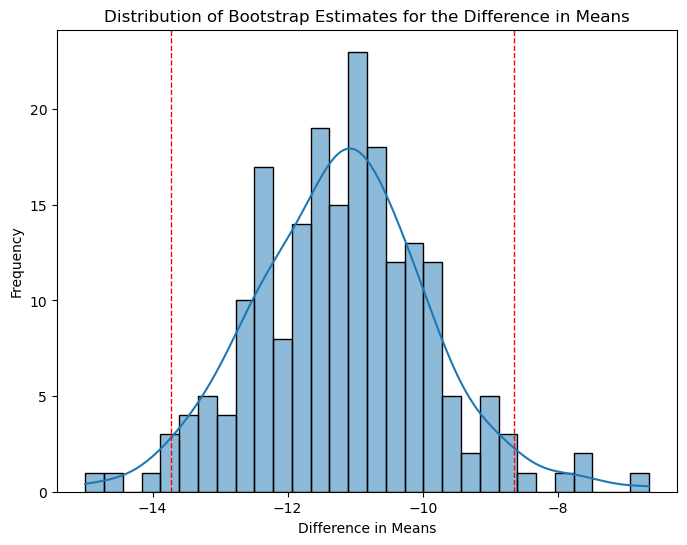

In [25]:
#TASK4-6 State and visualise the bootstrap 95% confidence interval for the difference in means of the two groups
# Plot the distribution of bootstrap estimates for the difference in means
plt.figure(figsize=(8, 6))
sns.histplot(boot_means_diff, bins=30, kde=True)
plt.axvline(confidence_interval[0], color= "red", linestyle='dashed', linewidth=1)
plt.axvline(confidence_interval[1], color= "red", linestyle='dashed', linewidth=1)
plt.title('Distribution of Bootstrap Estimates for the Difference in Means')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#TASK4-7 Compare the 95% confidence interval to those obtained using the statsmodels t-test
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
import pandas as pd

# statsmodels for t-test
sam_bef = pd.Series(sample_before)
sam_aft = pd.Series(sample_after)

# Create the DescrStatsW objects
d1 = DescrStatsW(data=sam_bef)
d2 = DescrStatsW(data=sam_aft)

# Confidence interval
lower, upper = (CompareMeans(d1=d1, d2=d2)).tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')

print("CIs: [{:.5f}, {:.5f}]".format(lower, upper))



#summary

The Task-4 primarily explored the efficiency of various testing methods on sample data. Under the same number of repetitions, the randomization test demonstrated significantly higher efficiency (0.047 seconds) compared to the modified version test (0.260 seconds). We were unable to identify a more expedient approach than randomization. The potential reason for this is that the first method involves multiple repeated sampling and calculates differences for each sampling iteration, while the second randomization method manually shuffles the labels of the two data groups before computing mean differences, resulting in a relatively lower computational cost and hence less time consumption.

The confidence intervals for sample mean differences calculated through bootstrap and statsmodels t-test exhibited minor discrepancies but can be generally negligible. The confidence interval indicates that the difference in mean stock closing prices between before and after December 1st, 2022, falls within the range of 8.50 to 13.89. (A negative value implies that the mean closing price before this date is lower than after this date.) The histogram of mean differences suggests an approximately normal distribution, providing a foundational analysis for further exploration of factors influencing stock prices. Given that our collected data only includes dates and prices without more diverse variables, the current dataset cannot analyze the correlation between stock price trends and other influential factors.